## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="outer", on= "Mouse ID")
# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(mouse_study_df)
#1893

mouse_count = mouse_study_df["Mouse ID"].nunique()
mouse_count
#249

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows= mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_rows

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates= mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID", "Timepoint"],keep= False)]
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= mouse_study_df.drop_duplicates(["Mouse ID", "Timepoint"],keep="last").reset_index(drop=True)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())
#249

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#creation of mean series.
mstv_mean = mouse_study_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tv_mean= pd.DataFrame(mstv_mean)

#creation of median series
mstv_median = mouse_study_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tv_median = pd.DataFrame(mstv_median)

#creation of variance series
mstv_var= mouse_study_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tv_var = pd.DataFrame(mstv_var)

#creation of std deviation series
mstv_std= mouse_study_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tv_std= pd.DataFrame(mstv_std)

#creation of SEM series
mstv_sem=mouse_study_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tv_sem= pd.DataFrame(mstv_sem)


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

# merge of mean and median
tumor_volume_df= pd.merge(tv_mean, tv_median, how="outer", on= "Drug Regimen")

# merge of variance into new df
tumor_volume_df= pd.merge(tumor_volume_df, tv_var, how="outer", on= "Drug Regimen")

# merge of std dev into new df
tumor_volume_df= pd.merge(tumor_volume_df, tv_std, how="outer", on= "Drug Regimen")

# merge of sem into df
tumor_volume_df= pd.merge(tumor_volume_df, tv_sem, how="outer", on= "Drug Regimen")

# rename columns
tumor_volume_df= tumor_volume_df.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume Mean (mm3)",
                                                "Tumor Volume (mm3)_y":"Tumor Volume Median (mm3)",
                                                "Tumor Volume (mm3)_x": "Tumor Volume Var (mm3)",
                                                "Tumor Volume (mm3)_y":"Tumor Volume Std Dev (mm3)",
                                                "Tumor Volume (mm3)":"Tumor Volume SEM (mm3)"})
tumor_volume_df.head()




c:\Users\Kevin\anaconda3\envs\bootcamp\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Tumor Volume (mm3)_x'} in the result is deprecated and will raise a MergeError in a future version.
  # This is added back by InteractiveShellApp.init_path()


,Tumor Volume Var (mm3),Tumor Volume Std Dev (mm3),Tumor Volume Var (mm3),Tumor Volume Std Dev (mm3),Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

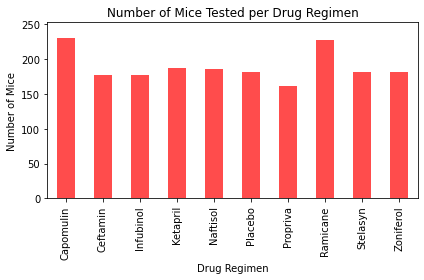

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# create groupby for bar chart
regimen_mouse_count = mouse_study_df.groupby("Drug Regimen").count()["Mouse ID"]

# create chart
regimen_mouse_count.plot(kind="bar",color= "red",alpha=0.7)

# Set y limit
plt.ylim(0, max(regimen_mouse_count[[1]])+75)


# Set a Title and labels
plt.title("Number of Mice Tested per Drug Regimen")
plt.ylabel("Number of Mice")

# Save graph 
plt.tight_layout()
plt.savefig("Images/pandas_mouse_count.png")
plt.show()

Text(0, 0.5, 'Number of Mice')

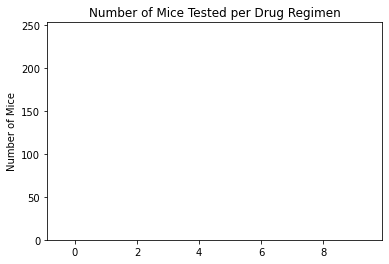

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# create x_axis
x_axis= np.arange(len(regimen_mouse_count))

# # # create chart
plt.bar(x_axis, [0])

# Set y limit
plt.ylim(0, max(regimen_mouse_count[[1]])+75)

# # # Set a Title and labels
plt.title("Number of Mice Tested per Drug Regimen")
plt.ylabel("Number of Mice")

# # Save graph 
# plt.tight_layout()
# plt.savefig("Images/pandas_mouse_count.png")
# plt.show()

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
